## Gauß- oder Normalverteilung

## Multivariante Wahrscheinlichkeitsverteilungen

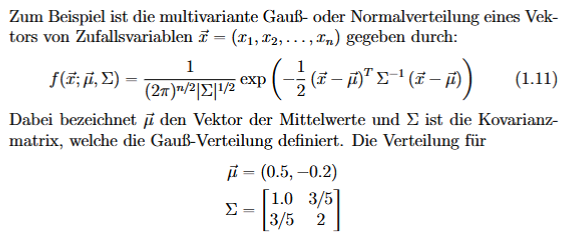

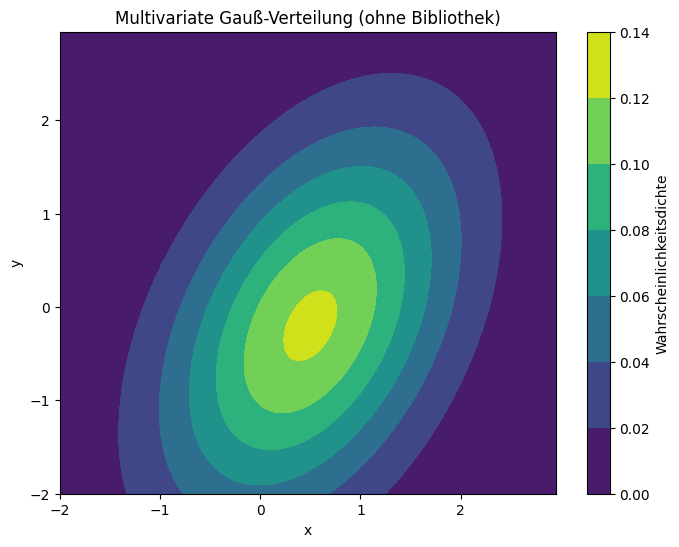

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definierte Parameter
mu = np.array([0.5, -0.2])  # Mittelwerte
Sigma = np.array([[1.0, 3/5], [3/5, 2]])  # Kovarianzmatrix

# Berechnung der Inversen und Determinante der Kovarianzmatrix
Sigma_inv = np.linalg.inv(Sigma)
det_Sigma = np.linalg.det(Sigma)

# Erstellen eines Gitters für x und y
x, y = np.mgrid[-2:3:.05, -2:3:.05]
pos = np.dstack((x, y))

# Berechnung der multivariaten Gauß-Funktion gemäß der Formel
def multivariate_gaussian(pos, mu, Sigma_inv, det_Sigma):
    n = len(mu)
    norm_factor = 1 / ((2 * np.pi) ** (n / 2) * np.sqrt(det_Sigma))
    diff = pos - mu
    exponent = -0.5 * np.einsum('...i,ij,...j', diff, Sigma_inv, diff)
    return norm_factor * np.exp(exponent)

# Berechnen der Wahrscheinlichkeitsdichte
pdf = multivariate_gaussian(pos, mu, Sigma_inv, det_Sigma)

# Plotten der Dichtefunktion
plt.figure(figsize=(8, 6))
plt.contourf(x, y, pdf, cmap='viridis')
plt.colorbar(label='Wahrscheinlichkeitsdichte')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multivariate Gauß-Verteilung (ohne Bibliothek)')
plt.show()


<Figure size 800x800 with 0 Axes>

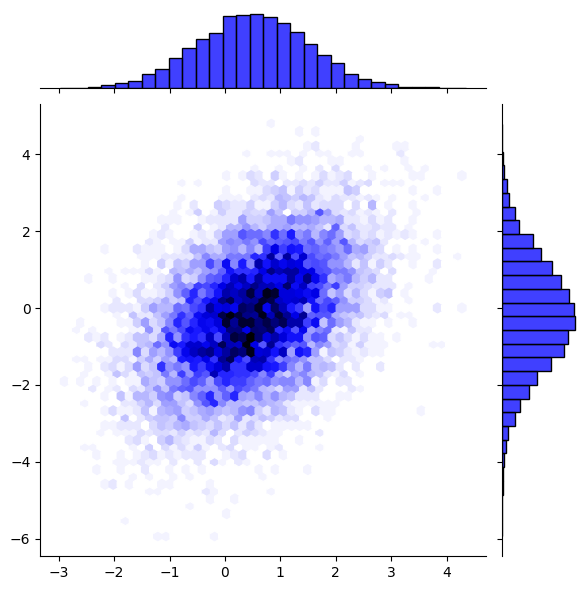

In [2]:
import seaborn as sns

# Zufallswerte aus der multivariaten Normalverteilung generieren
np.random.seed(42)
samples = np.random.multivariate_normal(mu, Sigma, 10000)

# Scatterplot mit Dichtediagrammen erstellen
plt.figure(figsize=(8, 8))
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind="hex", color="blue", marginal_kws={'bins': 30, 'fill': True})
plt.show()
